<a href="https://colab.research.google.com/github/Gyanendra079/Capstone-project-2/blob/main/Retail_Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Retail Sales Prediction



##### **Project Type**    - Regression
##### **Contribution**    - Individual


# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement** Rossmann operates over 3000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for upto six weeks in advance.Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonsonality and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied. You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.


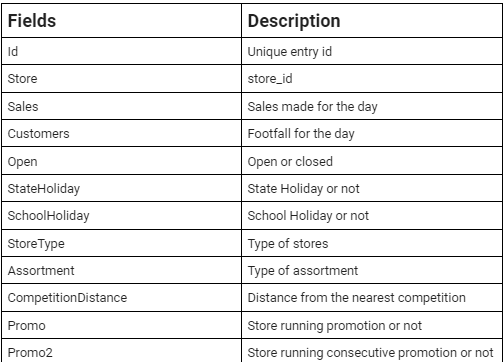

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [164]:
# Import Libraries
import pandas as pd
import numpy as np

#Data visualization 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split


# machine learning
import math
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import LassoLars
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import ElasticNet

In [165]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Dataset Loading

In [166]:
# Load Dataset
rossman_df = pd.read_csv("/content/drive/MyDrive/almabetter/capstone projects/Capstone Project 2/Rossmann Stores Data.csv")
store_df = pd.read_csv('/content/drive/MyDrive/almabetter/capstone projects/Capstone Project 2/Copy of store.csv')

### Dataset First View

In [167]:
# Dataset First Look
#retail store data
rossman_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [168]:
#store data
store_df

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


### Dataset Rows & Columns count

In [169]:
# Dataset Rows & Columns count
rossman_df.shape

(1017209, 9)

No. of rows in Rossmann store dataset are 1017209 and columns are 9.

In [170]:
store_df.shape

(1115, 10)

No. of rows in store dataset are 1115 and columns are 10.

### Dataset Information

In [171]:
# Dataset Info
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [172]:
rossman_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


#### Missing Values/Null Values

In the Rossmann store data CompetitionDistance 3 null values,CompetitionOpenSinceMonth & CompetitionOpenSinceYear 354 null values and Promo2SinceWeek,Promo2SinceYear,PromoInterval 544 null values.

In [173]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


All null are replaced with 0.

#### Duplicate Values

In [174]:
# Dataset Duplicate Value Count
rossman_df.duplicated(subset=None, keep='first')

0          False
1          False
2          False
3          False
4          False
           ...  
1017204    False
1017205    False
1017206    False
1017207    False
1017208    False
Length: 1017209, dtype: bool

In [175]:
store_df.duplicated(subset=None, keep='first')

0       False
1       False
2       False
3       False
4       False
        ...  
1110    False
1111    False
1112    False
1113    False
1114    False
Length: 1115, dtype: bool

No duplicates values are found in the dataset

### Information regarding the dataset

#Data Description
#Rossmann Stores Data.csv - historical data including Sales
#store.csv - supplemental information about the stores
#<b>Data fields<b>
Most of the fields are self-explanatory. The following are descriptions for those that aren't.

#1.Id - an Id that represents a (Store, Date) duple within the test set
#2.Store - a unique Id for each store
#3.Sales - the turnover for any given day (this is what you are predicting)
#4.Customers - the number of customers on a given day
#5.Open - an indicator for whether the store was open: 0 = closed, 1 = open
#6.StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
#7.SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
#8.StoreType - differentiates between 4 different store models: a, b, c, d
#9.Assortment - describes an assortment level: a = basic, b = extra, c = extended
#10.CompetitionDistance - distance in meters to the nearest competitor store
#11.CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
#12.Promo - indicates whether a store is running a promo on that day
#13.Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
#14.Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
#15.PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store




















## ***2. Understanding Your Variables***

In [176]:
# Dataset Columns
store_df.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [177]:
rossman_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

In [178]:
# Dataset Describe
store_df.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


In [179]:
rossman_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


### Check Unique Values for each variable.

In [180]:
# Check Unique Values for each variable.
print(rossman_df.DayOfWeek.unique())
print(rossman_df.Open.unique())	
print(rossman_df.Promo.unique())
print(rossman_df.StateHoliday.unique())
print(rossman_df.SchoolHoliday.unique())

[5 4 3 2 1 7 6]
[1 0]
[1 0]
['0' 'a' 'b' 'c' 0]
[1 0]


In [181]:
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [182]:
#Various type of column with different values
print(store_df.StoreType.unique())
print(store_df.Assortment.unique())
print(store_df.CompetitionOpenSinceMonth.unique())
print(store_df.CompetitionOpenSinceYear.unique())
print(store_df.Promo2.unique())
print(store_df.Promo2SinceWeek.unique())
print(store_df.	Promo2SinceYear.unique())
print(store_df.PromoInterval.unique())

['c' 'a' 'd' 'b']
['a' 'c' 'b']
[ 9. 11. 12.  4. 10.  8. nan  3.  6.  5.  1.  2.  7.]
[2008. 2007. 2006. 2009. 2015. 2013. 2014. 2000. 2011.   nan 2010. 2005.
 1999. 2003. 2012. 2004. 2002. 1961. 1995. 2001. 1990. 1994. 1900. 1998.]
[0 1]
[nan 13. 14.  1. 45. 40. 26. 22.  5.  6. 10. 31. 37.  9. 39. 27. 18. 35.
 23. 48. 36. 50. 44. 49. 28.]
[  nan 2010. 2011. 2012. 2009. 2014. 2015. 2013.]
[nan 'Jan,Apr,Jul,Oct' 'Feb,May,Aug,Nov' 'Mar,Jun,Sept,Dec']


## 3. ***Data Wrangling***

# Filling the null values with 0.

In [183]:
store_df['CompetitionOpenSinceMonth'].fillna(store_df['CompetitionOpenSinceMonth'].mode()[0], inplace = True)
store_df['CompetitionDistance'].fillna(store_df['CompetitionDistance'].median(), inplace = True)
store_df['CompetitionOpenSinceYear'].fillna(store_df['CompetitionOpenSinceYear'].mode()[0], inplace = True)
store_df['Promo2SinceWeek'].fillna(0, inplace = True)
store_df['Promo2SinceYear'].fillna(0, inplace = True)
store_df['PromoInterval'].fillna(0, inplace = True)

In [184]:
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0


In [185]:
rossman_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [186]:
rossman_df["Date"]=pd.to_datetime(rossman_df["Date"])
rossman_df["Year"]=rossman_df["Date"].dt.year
rossman_df["Month"]=rossman_df["Date"].dt.month
rossman_df["Day"]=rossman_df["Date"].dt.day
rossman_df["Week"]=rossman_df["Date"].dt.week%4
rossman_df["WeekOfYear"]=rossman_df["Date"].dt.week

In [187]:
rossman_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,Week,WeekOfYear
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,7,31,3,31
1,2,5,2015-07-31,6064,625,1,1,0,1,2015,7,31,3,31
2,3,5,2015-07-31,8314,821,1,1,0,1,2015,7,31,3,31
3,4,5,2015-07-31,13995,1498,1,1,0,1,2015,7,31,3,31
4,5,5,2015-07-31,4822,559,1,1,0,1,2015,7,31,3,31


In [188]:
df = rossman_df.merge(store_df, how='outer', on=['Store'])

In [189]:
print(df[df['StoreType'] == 'a']['Sales'].mean())
print(df[df['StoreType'] == 'b']['Sales'].mean())
print(df[df['StoreType'] == 'c']['Sales'].mean())
print(df[df['StoreType'] == 'd']['Sales'].mean())

5738.179710202728
10058.837334175616
5723.6292458345515
5641.819243109884


In [190]:
df_copy = df.copy()

In [191]:
df_copy.drop(['Date'], axis = 1, inplace = True)

In [192]:
df_copy['CompetitionOpen'] = 0
df_copy['PromoOpen'] = 0

In [193]:
df_copy['CompetitionOpen'] = (df_copy['CompetitionOpen'].where(df_copy['CompetitionOpenSinceYear'] == 0, other= (12 * (df_copy['Year'] - df_copy['CompetitionOpenSinceYear'])) + (df_copy['Month'] - df_copy['CompetitionOpenSinceMonth'])))
df_copy['PromoOpen'] = ( 12 * (df_copy['Year'] - df_copy['Promo2SinceYear'])) + df_copy['Month'] - ((df_copy['Promo2SinceWeek']/4))

In [194]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 24 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Sales                      1017209 non-null  int64  
 3   Customers                  1017209 non-null  int64  
 4   Open                       1017209 non-null  int64  
 5   Promo                      1017209 non-null  int64  
 6   StateHoliday               1017209 non-null  object 
 7   SchoolHoliday              1017209 non-null  int64  
 8   Year                       1017209 non-null  int64  
 9   Month                      1017209 non-null  int64  
 10  Day                        1017209 non-null  int64  
 11  Week                       1017209 non-null  int64  
 12  WeekOfYear                 1017209 non-null  int64  
 13  StoreType   

In [195]:
df_copy[df_copy['PromoOpen']<0]

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,...,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,CompetitionOpen,PromoOpen
17926,20,1,9229,954,1,1,0,0,2014,6,...,a,2340.0,5.0,2009.0,1,40.0,2014.0,"Jan,Apr,Jul,Oct",61,-4.00
17927,20,7,0,0,0,0,0,0,2014,6,...,a,2340.0,5.0,2009.0,1,40.0,2014.0,"Jan,Apr,Jul,Oct",61,-4.00
17928,20,6,5572,566,1,0,0,0,2014,6,...,a,2340.0,5.0,2009.0,1,40.0,2014.0,"Jan,Apr,Jul,Oct",61,-4.00
17929,20,5,7149,839,1,0,0,0,2014,6,...,a,2340.0,5.0,2009.0,1,40.0,2014.0,"Jan,Apr,Jul,Oct",61,-4.00
17930,20,4,8118,997,1,0,0,0,2014,6,...,a,2340.0,5.0,2009.0,1,40.0,2014.0,"Jan,Apr,Jul,Oct",61,-4.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1013436,1111,6,3325,291,1,0,0,0,2013,1,...,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",-17,-6.75
1013437,1111,5,4640,453,1,0,0,1,2013,1,...,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",-17,-6.75
1013438,1111,4,4579,444,1,0,0,1,2013,1,...,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",-17,-6.75
1013439,1111,3,5097,505,1,0,0,1,2013,1,...,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",-17,-6.75


In [196]:
#We can make these negative value of promo equal to zero since no promo is given in these store
df_copy.loc[df_copy['PromoOpen'] <0, 'PromoOpen' ] = 0

In [197]:
df_copy[df_copy['PromoOpen'] <0]

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,...,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,CompetitionOpen,PromoOpen


In [198]:
# again applying the same thing for CompetitionOpen
df_copy.loc[df_copy['CompetitionOpen'] <0, 'CompetitionOpen' ] = 0
df_copy[df_copy['CompetitionOpen'] <0]

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,...,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,CompetitionOpen,PromoOpen


In [199]:
df_copy['CompetitionOpen'].value_counts()

0       186813
6        17418
4        17377
8        17348
7        17074
         ...  
1357        28
199         28
616         28
1381        28
628         28
Name: CompetitionOpen, Length: 336, dtype: int64

In [200]:
df_copy['PromoOpen'].value_counts()

0.0        70285
24187.0    16864
24173.0    16864
24159.0    16864
24161.0    16864
           ...  
56.0          31
49.0          31
48.0          31
46.0          31
47.0          30
Name: PromoOpen, Length: 293, dtype: int64

In [201]:
df_copy['PromoOpen'].max()

24187.0

In [202]:
df_copy['PromoOpen']

0          24187.0
1          24187.0
2          24187.0
3          24187.0
4          24187.0
            ...   
1017204        7.5
1017205        7.5
1017206        7.5
1017207        7.5
1017208        7.5
Name: PromoOpen, Length: 1017209, dtype: float64

In [203]:
df_copy.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,...,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,CompetitionOpen,PromoOpen
0,1,5,5263,555,1,1,0,1,2015,7,...,a,1270.0,9.0,2008.0,0,0.0,0.0,0,82,24187.0
1,1,4,5020,546,1,1,0,1,2015,7,...,a,1270.0,9.0,2008.0,0,0.0,0.0,0,82,24187.0
2,1,3,4782,523,1,1,0,1,2015,7,...,a,1270.0,9.0,2008.0,0,0.0,0.0,0,82,24187.0
3,1,2,5011,560,1,1,0,1,2015,7,...,a,1270.0,9.0,2008.0,0,0.0,0.0,0,82,24187.0
4,1,1,6102,612,1,1,0,1,2015,7,...,a,1270.0,9.0,2008.0,0,0.0,0.0,0,82,24187.0


In [204]:
df_copy['PromoOpen'].min()

0.0

In [205]:
df_copy[df_copy['Promo'] == 0]

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,...,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,CompetitionOpen,PromoOpen
5,1,7,0,0,0,0,0,0,2015,7,...,a,1270.0,9.0,2008.0,0,0.0,0.0,0,82,24187.0
6,1,6,4364,500,1,0,0,0,2015,7,...,a,1270.0,9.0,2008.0,0,0.0,0.0,0,82,24187.0
7,1,5,3706,459,1,0,0,0,2015,7,...,a,1270.0,9.0,2008.0,0,0.0,0.0,0,82,24187.0
8,1,4,3769,503,1,0,0,0,2015,7,...,a,1270.0,9.0,2008.0,0,0.0,0.0,0,82,24187.0
9,1,3,3464,463,1,0,0,0,2015,7,...,a,1270.0,9.0,2008.0,0,0.0,0.0,0,82,24187.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1115,6,4771,339,1,0,0,1,2013,1,...,c,5350.0,9.0,2013.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",0,7.5
1017205,1115,5,4540,326,1,0,0,1,2013,1,...,c,5350.0,9.0,2013.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",0,7.5
1017206,1115,4,4297,300,1,0,0,1,2013,1,...,c,5350.0,9.0,2013.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",0,7.5
1017207,1115,3,3697,305,1,0,0,1,2013,1,...,c,5350.0,9.0,2013.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",0,7.5


In [206]:
df_copy.loc[df_copy['Promo2'] ==0, 'PromoOpen'] = 0

In [207]:
df_copy[df_copy['Promo'] == 0]

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,...,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,CompetitionOpen,PromoOpen
5,1,7,0,0,0,0,0,0,2015,7,...,a,1270.0,9.0,2008.0,0,0.0,0.0,0,82,0.0
6,1,6,4364,500,1,0,0,0,2015,7,...,a,1270.0,9.0,2008.0,0,0.0,0.0,0,82,0.0
7,1,5,3706,459,1,0,0,0,2015,7,...,a,1270.0,9.0,2008.0,0,0.0,0.0,0,82,0.0
8,1,4,3769,503,1,0,0,0,2015,7,...,a,1270.0,9.0,2008.0,0,0.0,0.0,0,82,0.0
9,1,3,3464,463,1,0,0,0,2015,7,...,a,1270.0,9.0,2008.0,0,0.0,0.0,0,82,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1115,6,4771,339,1,0,0,1,2013,1,...,c,5350.0,9.0,2013.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",0,7.5
1017205,1115,5,4540,326,1,0,0,1,2013,1,...,c,5350.0,9.0,2013.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",0,7.5
1017206,1115,4,4297,300,1,0,0,1,2013,1,...,c,5350.0,9.0,2013.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",0,7.5
1017207,1115,3,3697,305,1,0,0,1,2013,1,...,c,5350.0,9.0,2013.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",0,7.5


In [208]:
df_copy['PromoOpen'].value_counts()

0.00     578316
39.75      4245
23.50      4169
24.50      4138
21.50      4134
          ...  
56.00        31
49.00        31
48.00        31
46.00        31
47.00        30
Name: PromoOpen, Length: 262, dtype: int64

In [209]:
df_copy.drop(['CompetitionOpenSinceMonth',	'CompetitionOpenSinceYear',	'Promo2',	'Promo2SinceWeek'	,'Promo2SinceYear'], axis= 1, inplace = True)

In [210]:
df_copy = pd.get_dummies(columns = ['StoreType',	'Assortment'], data = df_copy, drop_first = True)

In [211]:
i_sales = df_copy[df_copy['Sales'] == 0].index

In [212]:
df_copy.drop(i_sales, inplace = True)

In [213]:
df_copy.reset_index(inplace = True)

In [214]:
df_copy

,index,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,...,WeekOfYear,CompetitionDistance,PromoInterval,CompetitionOpen,PromoOpen,StoreType_b,StoreType_c,StoreType_d,Assortment_b,Assortment_c
0,0,1,5,5263,555,1,1,0,1,2015,...,31,1270.0,0,82,0.0,0,1,0,0,0
1,1,1,4,5020,546,1,1,0,1,2015,...,31,1270.0,0,82,0.0,0,1,0,0,0
2,2,1,3,4782,523,1,1,0,1,2015,...,31,1270.0,0,82,0.0,0,1,0,0,0
3,3,1,2,5011,560,1,1,0,1,2015,...,31,1270.0,0,82,0.0,0,1,0,0,0
4,4,1,1,6102,612,1,1,0,1,2015,...,31,1270.0,0,82,0.0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844333,1017202,1115,1,6905,471,1,1,0,1,2013,...,2,5350.0,"Mar,Jun,Sept,Dec",0,7.5,0,0,1,0,1
844334,1017204,1115,6,4771,339,1,0,0,1,2013,...,1,5350.0,"Mar,Jun,Sept,Dec",0,7.5,0,0,1,0,1
844335,1017205,1115,5,4540,326,1,0,0,1,2013,...,1,5350.0,"Mar,Jun,Sept,Dec",0,7.5,0,0,1,0,1
844336,1017206,1115,4,4297,300,1,0,0,1,2013,...,1,5350.0,"Mar,Jun,Sept,Dec",0,7.5,0,0,1,0,1


In [215]:
col_df_copy =['Store', 'DayOfWeek', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'Year', 'Month', 'Day', 'Week',
       'WeekOfYear', 'CompetitionDistance', 'PromoInterval', 'CompetitionOpen', 'PromoOpen',
       'StoreType_b', 'StoreType_c', 'StoreType_d', 'Assortment_b',
       'Assortment_c', 'Sales']

In [216]:
df_copy = df_copy.reindex(columns =col_df_copy)

In [217]:
df_copy.head()

,Store,DayOfWeek,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,...,CompetitionDistance,PromoInterval,CompetitionOpen,PromoOpen,StoreType_b,StoreType_c,StoreType_d,Assortment_b,Assortment_c,Sales
0,1,5,555,1,1,0,1,2015,7,31,...,1270.0,0,82,0.0,0,1,0,0,0,5263
1,1,4,546,1,1,0,1,2015,7,30,...,1270.0,0,82,0.0,0,1,0,0,0,5020
2,1,3,523,1,1,0,1,2015,7,29,...,1270.0,0,82,0.0,0,1,0,0,0,4782
3,1,2,560,1,1,0,1,2015,7,28,...,1270.0,0,82,0.0,0,1,0,0,0,5011
4,1,1,612,1,1,0,1,2015,7,27,...,1270.0,0,82,0.0,0,1,0,0,0,6102


In [218]:
print(df_copy['CompetitionOpen'].max())
print(df_copy['CompetitionOpen'].min())

print(df_copy['PromoOpen'].max())
print(df_copy['PromoOpen'].min())

1386
0
71.25
0.0


In [219]:
df_copy[df_copy['CompetitionOpen'] == 1386]['Store'].unique()

array([815])

In [220]:
df_copy[df_copy['PromoOpen'] == 71.25]['Store'].unique()

array([158, 277, 370, 612, 637, 808, 960])

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

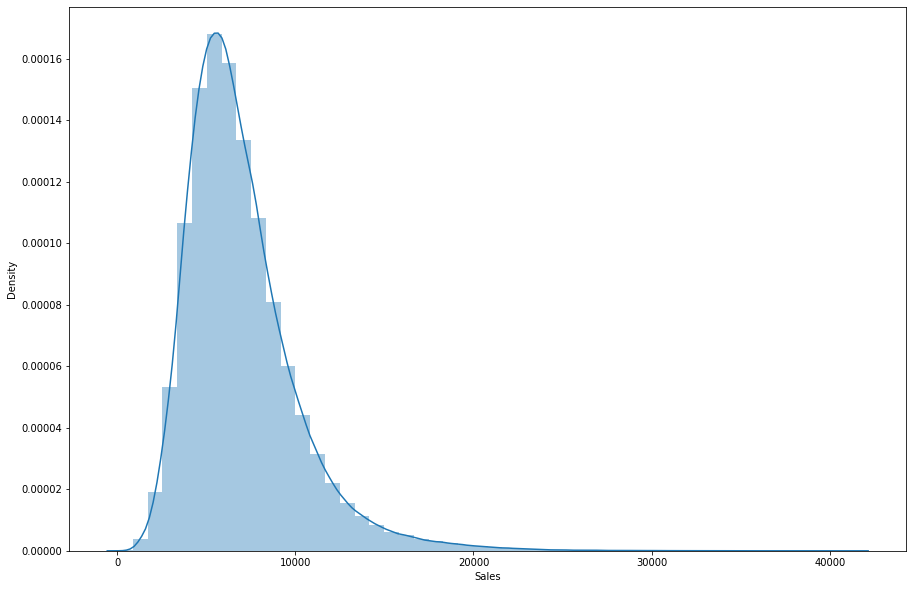

In [221]:
plt.figure(figsize=(15,10))
sns.distplot(df_copy['Sales'])

From the graph we can see that it is rightly skewed and so we can use log tranform.

In [222]:
df_copy = pd.get_dummies(columns = ['PromoInterval', 'StateHoliday'], data = df_copy, drop_first = True)

In [223]:
# the independent variables are as follows
df_copy.describe().columns

Index(['Store', 'DayOfWeek', 'Customers', 'Open', 'Promo', 'SchoolHoliday',
       'Year', 'Month', 'Day', 'Week', 'WeekOfYear', 'CompetitionDistance',
       'CompetitionOpen', 'PromoOpen', 'StoreType_b', 'StoreType_c',
       'StoreType_d', 'Assortment_b', 'Assortment_c', 'Sales',
       'PromoInterval_Feb,May,Aug,Nov', 'PromoInterval_Jan,Apr,Jul,Oct',
       'PromoInterval_Mar,Jun,Sept,Dec', 'StateHoliday_0', 'StateHoliday_a',
       'StateHoliday_b', 'StateHoliday_c'],
      dtype='object')

In [224]:
numeric_feature = ['Customers', 'CompetitionDistance','CompetitionOpen', 'PromoOpen']

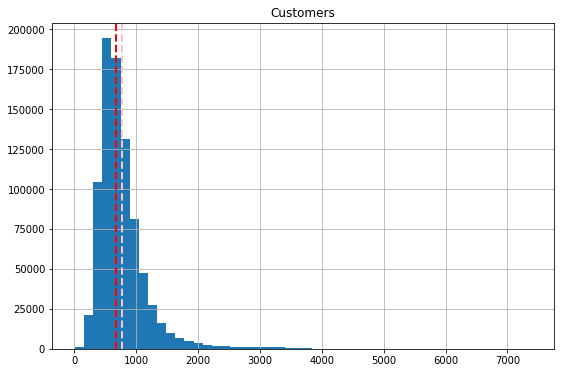

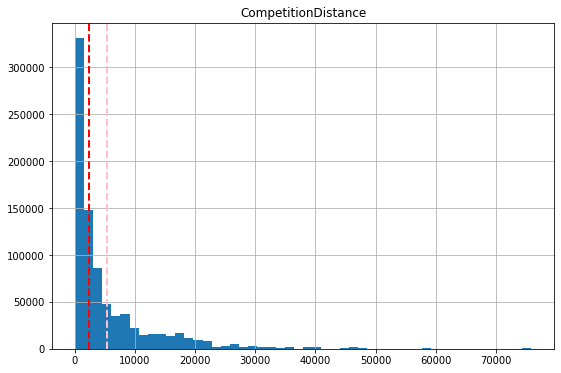

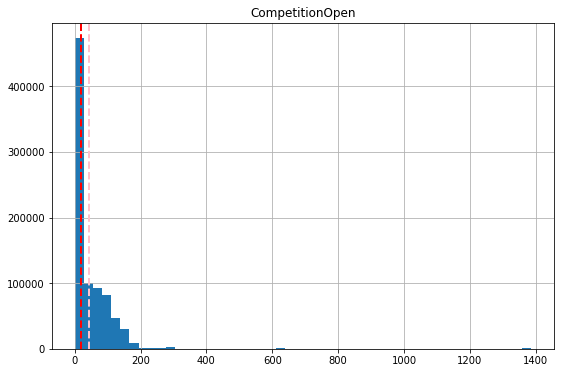

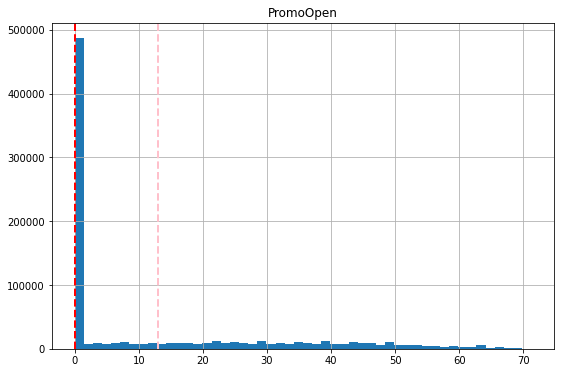

In [225]:
for col in numeric_feature:
  fig = plt.figure(figsize=(9, 6))
  ax = fig.gca()
  df_copy[col].hist(bins=50, ax = ax)
  ax.axvline(df_copy[col].mean(), color = 'pink',linestyle='dashed', linewidth=2)
  ax.axvline(df_copy[col].median(), color = 'red',linestyle='dashed', linewidth=2)
  ax.set_title(col)

In [226]:
# change to logarithm to get normal
df_copy['Customer_ln'] = df_copy['Customers'].map(lambda x : np.log(x) if x != 0 else 0)
df_copy['CompetitionDistance_ln'] = df_copy['CompetitionDistance'].map(lambda x : np.log(x) if x != 0 else 0)
df_copy['PromoOpen_ln'] = df_copy['PromoOpen'].map(lambda x : np.log(x) if x != 0 else 0)
df_copy['CompetitionOpen_ln'] = df_copy['CompetitionOpen'].map(lambda x : np.log(x) if x != 0 else 0)
df_copy['Sales_sqrt'] = df_copy['Sales'].map(lambda x : np.sqrt(x) if x != 0 else 0)

In [227]:
numeric_feature_ln = ['Customer_ln','CompetitionDistance_ln','PromoOpen_ln','CompetitionOpen_ln']

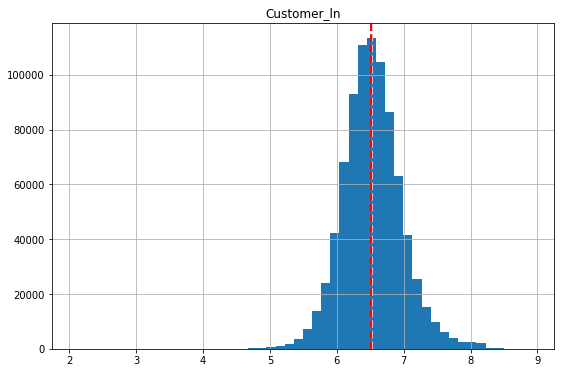

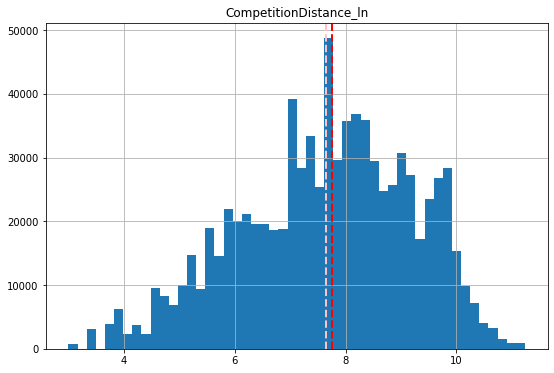

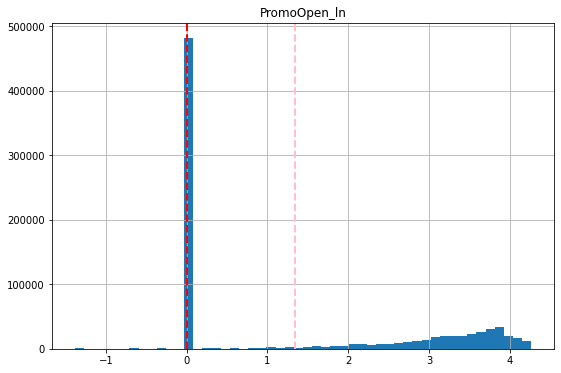

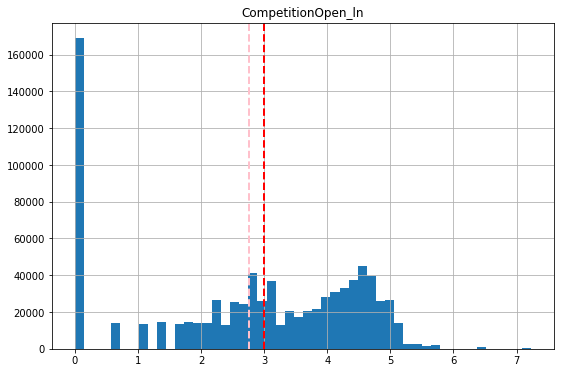

In [228]:
for col in numeric_feature_ln:
  fig = plt.figure(figsize=(9, 6))
  ax = fig.gca()
  df_copy[col].hist(bins=50, ax = ax)
  ax.axvline(df_copy[col].mean(), color = 'pink',linestyle='dashed', linewidth=2)
  ax.axvline(df_copy[col].median(), color = 'red',linestyle='dashed', linewidth=2)
  ax.set_title(col)

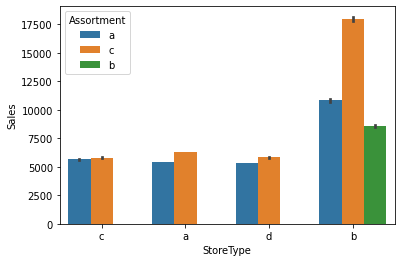

In [229]:
#Let's check the relationship between store type, assortment levels and sales
sns.barplot(x= df["StoreType"],y= df['Sales'],hue= df["Assortment"])

The above bar plot shows that the store types a, c and d have only assortment level a and c. On the other hand the store type b has all the three kinds of assortment strategies, a reason why average sales were high for store type b stores

**Sales vs customer**

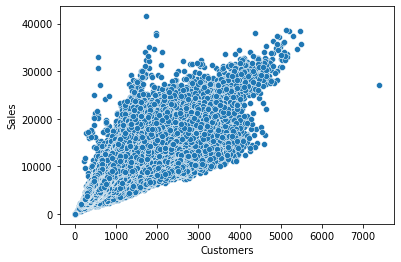

In [230]:
#scatterplot of Customers and Sales
sns.scatterplot(x=df['Customers'], y=df['Sales'])

From the above plot we can say that as the no. of customer increases the sales also increases.

In [231]:
#Store Type and Sales Exploration
store_type = df.groupby("StoreType")["Sales","Customers"].sum().reset_index()
store_type.sort_values(["Sales","Customers"], ascending= False, inplace = True) # sorting into descending order to get higher values
store_type

,StoreType,Sales,Customers
0,a,3165334859,363541434
3,d,1765392943,156904995
2,c,783221426,92129705
1,b,159231395,31465621


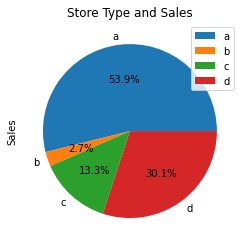

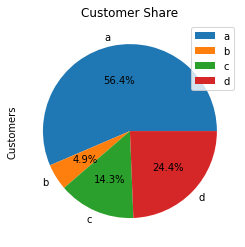

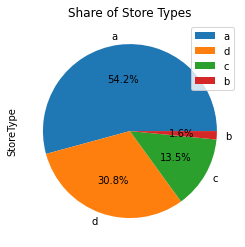

In [232]:
#let's explore store type a bit and it's influence on sales
df.groupby("StoreType")["Sales"].sum().plot.pie(title='Store Type and Sales', legend=True, autopct='%1.1f%%')
plt.show()
#customers and store type
df.groupby("StoreType")["Customers"].sum().plot.pie(title='Customer Share', legend=True, autopct='%1.1f%%')
plt.show()
#store types in all of the dataset
df["StoreType"].value_counts().plot.pie(title='Share of Store Types', legend=True, autopct='%1.1f%%')
plt.show()

First two pie shows the sales and customers data on the basis of various store type.Two type of conclusion we can draw from them are:-

*   Type a has the maximum share in both of them
*   Type b has the minimum share in both of them

In terms total store type order in descending format is a,d,c and b



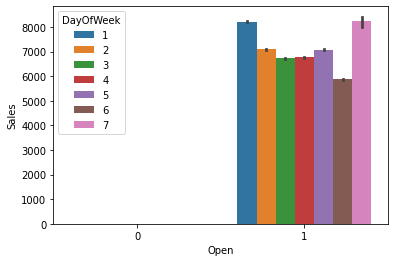

In [233]:
# open and storetype relationship 
#It suggests that whether the store was open or closed for refurbishment on weekends and holidays
sns.barplot(x=rossman_df["Open"],y=rossman_df['Sales'],hue=rossman_df["DayOfWeek"])

Monday and Sunday are the two most days where refurbishment occurs more times since they starting and ending of the week so store are busy in picking up the pace and cleaning the store more often.

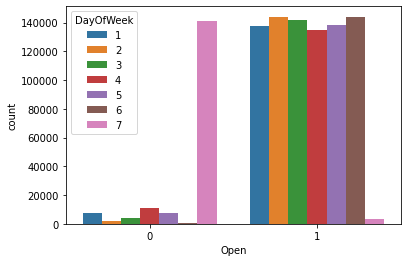

In [234]:
#Lets see open, how many shops are open on which days 
#It gives a counts of stores closed for refurbishment and suggests that most stores are closed on sunday
sns.countplot(x=rossman_df["Open"], hue=rossman_df["DayOfWeek"])

Here we can clearly see two category 0 means close and sunday has highest value and 1 means open and sunday has very low value in this category.

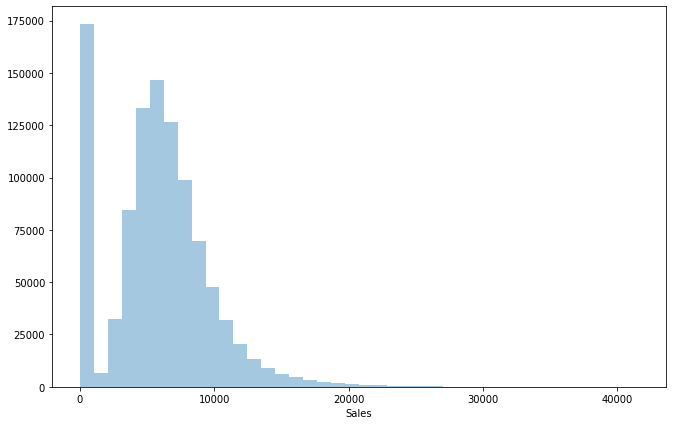

In [235]:
#distribution of sales
fig, ax = plt.subplots()
fig.set_size_inches(11, 7)
#distribution plot for sales in rossmann store data
sns.distplot(rossman_df['Sales'], kde = False,bins=40);

Sales are larges in the 0-1,000 range then, it is rightly skewed in range 1,000-20,000

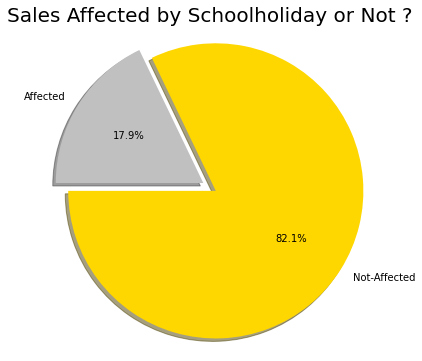

In [236]:
labels = 'Not-Affected' , 'Affected'
sizes = rossman_df.SchoolHoliday.value_counts()
colors = ['gold', 'silver']
explode = (0.1, 0.0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=180)
plt.axis('equal')
plt.title("Sales Affected by Schoolholiday or Not ?",fontsize=20)
plt.plot()
fig=plt.gcf()                           #get the current figure
fig.set_size_inches(6,6)
plt.show()

Here the sales affected by schoolholiday is approx. 18% which tells us that during that day its commodities bought are less in comparison to other days when school are open.

#Correlation Heatmap

In [237]:
#Merging the two dataset on left join
df = pd.merge(rossman_df, store_df, how='left', on='Store')
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,...,WeekOfYear,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,...,31,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,2015,...,31,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,2015,...,31,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,2015,...,31,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,2015,...,31,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0


**Correlation Matrix:**
Correlation is a statistical term used to measure the degree in which two variables move in relation to each other. A perfect positive correlation means that the correlation coefficient is exactly 1. This implies that as one variable moves, either up or down, the other moves in the same direction. A perfect negative correlation means that two variables move in opposite directions, while a zero correlation implies no linear relationship at all

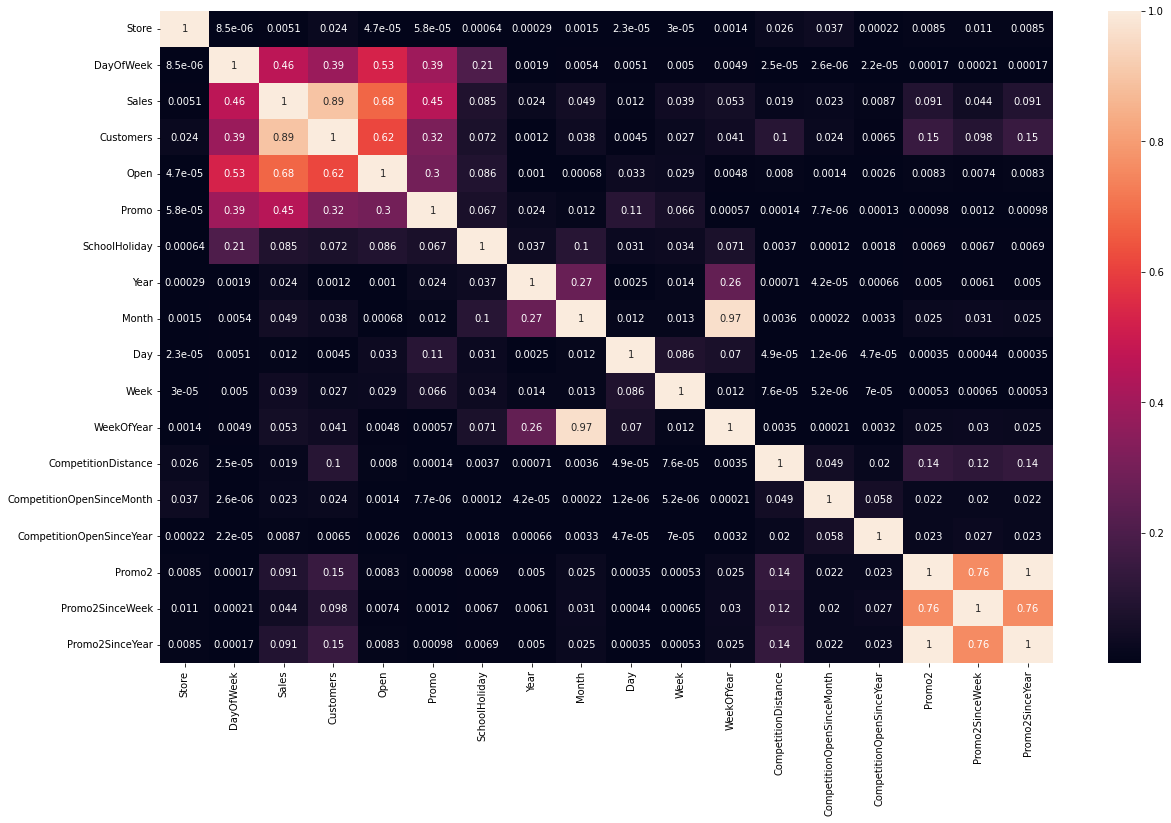

In [238]:
plt.subplots(figsize=(20,12))
sns.heatmap(df.corr().abs(), annot=True)

Points to be noted are:-
1.   Sales and Customer are most highly correlated since both are based on demand and supply of various product
2.   CompetitonOpenSinceYear and CompetitionOpenSinceMonth has the second highest correlation which is obvious as both are analysis are based market grasping.
3.   Various kind of promos are third in correlation matrix which is because of same type of data regarding the discount provided by the stores. 
3.   Dayofweek,sales,customers,open,promo these are medium in correlation excluding sales and customers.



## ***5. Hypothesis Testing***

Some statements we can derive from the above charts and graph:-
1.   $H_{0}$ - Customer have median value of 500. $H_{1}$ - Customer does not have median value of 500.
1.   $H_{0}$ - Customer have mean value of 600. $H_{1}$ - Customer does not have mean value of 600
1.   $H_{0}$ - Competition distance have median value of 2400. $H_{1}$ -  Competition distance does not have median value of 2400
2.   $H_{0}$ - Competition distance have mean value of 5000. $H_{1}$ -  Competition distance does not have mean value of 5000
2.   $H_{0}$ - Competition open have median value of 5. $H_{1}$ -  Competition open does not have median value of 5
2.   $H_{0}$ - Competition open have mean value of 20. $H_{1}$ -  Competition open does not have mean value of 20
2.   $H_{0}$ - Promo open have median value of 0. $H_{1}$ -  Promo open does not have median value of 0
1.   $H_{0}$ - Promo open have mean value of 13. $H_{1}$ -  Promo open does not have mean value of 0
1.   $H_{0}$ - Customer and sales are +ive skewed data. $H_{1}$ -  Customer and sales are -ive skewed data
1.   $H_{0}$ - Sales have highest value 5000. $H_{1}$ - Sales does not highest value of 5000.
*   Here all the statements in the Null Hypothesis are true which are directly derived from the charts and graphs










## ***6. Feature Engineering & Data Pre-processing***

#Getting the data ready for model implementation

In [239]:
df = pd.merge(rossman_df, store_df, how='left', on='Store')
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,...,WeekOfYear,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,...,31,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,2015,...,31,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,2015,...,31,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,2015,...,31,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,2015,...,31,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0


In [240]:
df.shape

(1017209, 23)

In [241]:
df.CompetitionDistance.describe()
# The obsverations are continous numbers, so we need to convert them into a categories. Lets a create a new variable.
df["CompetitionDistance_Cat"] = pd.cut(df["CompetitionDistance"], 5)

In [242]:
df.drop(['CompetitionDistance_Cat'],axis=1,inplace=True)

Removing outliers of Sales column

In [243]:
#removing outliers
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [244]:
# defining new variable after removing outliers
df= remove_outlier(df, 'Sales')

Drop subset of the data might cause bias

In [245]:
# where stores are closed, they won't generate sales, so we will remove that part of the dataset
df = df[df.Open != 0]

In [246]:
# Open isn't a variable anymore, so we'll drop it too
df = df.drop('Open', axis=1)

In [247]:
# Check if there's any opened store with zero sales
df[df.Sales == 0]['Store'].sum()

31460

In [248]:
# see the percentage of open stored with zero sales
df[df.Sales == 0]['Sales'].sum()/df.Sales.sum()

0.0

In [249]:
# remove this part of data to avoid bias
df = df[df.Sales != 0]

In [250]:
df_new=df.copy()

In [251]:
df_new = pd.get_dummies(df_new,columns=['StoreType','Assortment'])

In [252]:
df_new.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,Year,Month,...,Promo2SinceWeek,Promo2SinceYear,PromoInterval,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
0,1,5,2015-07-31,5263,555,1,0,1,2015,7,...,0.0,0.0,0,0,0,1,0,1,0,0
1,2,5,2015-07-31,6064,625,1,0,1,2015,7,...,13.0,2010.0,"Jan,Apr,Jul,Oct",1,0,0,0,1,0,0
2,3,5,2015-07-31,8314,821,1,0,1,2015,7,...,14.0,2011.0,"Jan,Apr,Jul,Oct",1,0,0,0,1,0,0
3,4,5,2015-07-31,13995,1498,1,0,1,2015,7,...,0.0,0.0,0,0,0,1,0,0,0,1
4,5,5,2015-07-31,4822,559,1,0,1,2015,7,...,0.0,0.0,0,1,0,0,0,1,0,0


#Setting features and target variables

In [253]:
X = df_new.drop(['Sales','Store','Date','Year'] , axis = 1)
y= df_new.Sales

In [254]:
X.shape

(817644, 23)

In [255]:
#Again dropping the irrelevant column
X = X.drop(['StateHoliday','CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'] , axis = 1)

## ***7. ML Model Implementation***

**Spltting the data into training and test set**

In [256]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=0)

In [257]:
columns=X_train.columns

#**Implementing Supervised Machine Learning algorithms.**

#**1. Linear Regression (OLS)**

In [258]:
# Transforming data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [259]:
# Fitting Multiple Linear Regression to the Training set
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [260]:
regressor.intercept_

-1517.3866416092915

In [261]:
regressor.coef_

array([-1.30793001e+02,  3.06864784e+04,  1.09309067e+03,  2.31844638e+01,
        3.55689662e+02,  4.03244698e+01,  1.87450052e+01, -1.59704315e+02,
        1.82430988e+03,  3.10718370e+02,  3.18127506e+02, -1.90167940e+03,
        1.67432218e+02,  1.41611967e+03,  1.44684880e+03, -3.17946943e+03,
        1.73262062e+03])

In [262]:
y_pred_train = regressor.predict(X_train)

In [263]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [264]:
mean_squared_error(y_test, y_pred)

1329394.9459479763

In [265]:
# Test performance
math.sqrt(mean_squared_error(y_test, y_pred))

1152.9939054253393

In [266]:
train_score_1=regressor.score(X_train,y_train)
train_score_1

0.7807575485643752

In [267]:
test_score_1=regressor.score(X_test,y_test)
test_score_1

0.7823938083318793

In [268]:
#storing 100 observations for analysis
simple_lr_pred = y_pred[:100]
simple_lr_real = y_test[:100]
dataset_lr = pd.DataFrame({'Real':simple_lr_real,'PredictedLR':simple_lr_pred}) #storing these values into dataframe

In [269]:
#storing absolute diffrences between actual sales price and predicted
dataset_lr['diff']=(dataset_lr['Real']-dataset_lr['PredictedLR']).abs()

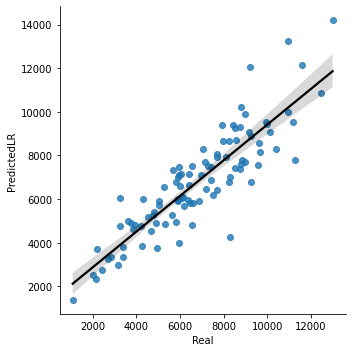

In [270]:
#visualising our predictions through intermediate plot
sns.lmplot(x='Real', y='PredictedLR', data=dataset_lr, line_kws={'color': 'black'});

#Inferences On Linear Regression Coefficients

In [271]:
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                 1.947e+05
Date:                Sat, 11 Feb 2023   Prob (F-statistic):               0.00
Time:                        05:26:00   Log-Likelihood:            -6.9257e+06
No. Observations:              817644   AIC:                         1.385e+07
Df Residuals:                  817628   BIC:                         1.385e+07
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                -998.7375      5.789   -172.510      0.000   -1010.085    -987.390
DayOfWeek             -21.1296      0.785    -26.909      0.000     -22.669     -19.591
Customers               7.2260      0.005   1471.992      0.000       7.216       7.236
Promo                1092.8057      2.772    394.264      0.000    1087.373    1098.238
SchoolHoliday          27.4413      3.326      8.249      0.000      20.922      33.961
Month                  33.2592      1.433     23.213      0.000      30.451      36.067
Day                     1.3377      0.152      8.784      0.000       1.039       1.636
Week                    5.5294      1.152      4.799      0.000       3.271       7.788
WeekOfYear             -3.4161      0.330    -10.354      0.000      -4.063      -2.769
CompetitionDistance     0.0240      0.000    140.526      0.000       0.024       0.024
Promo2                307.7805      2.662    115.638      0.000     302.564     312.997
StoreType_a            65.1683      4.789     13.608      0.000      55.782      74.555
StoreType_b         -2142.1898     12.731   -168.263      0.000   -2167.142   -2117.237
StoreType_c           -83.3386      5.321    -15.661      0.000     -93.768     -72.909
StoreType_d          1161.6226      5.032    230.849      0.000    1151.760    1171.485
Assortment_a         1112.7743      6.468    172.044      0.000    1100.097    1125.451
Assortment_b        -3512.4061     15.389   -228.235      0.000   -3542.569   -3482.243
Assortment_c         1400.8944      6.654    210.545      0.000    1387.853    1413.935
==============================================================================
Omnibus:                    49072.855   Durbin-Watson:                   1.716
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           145387.321
Skew:                           0.301   Prob(JB):                         0.00
Kurtosis:                       4.976   Cond. No.                     4.26e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.14e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

#2. LARS Lasso Regression

In [272]:
las = LassoLars(alpha=0.3, fit_intercept=False, normalize=True)
lasreg = las.fit(X_train, y_train)

In [273]:
def rmse(x, y):
    return sqrt(mean_squared_error(x, y))

# definte MAPE function
def mape(x, y): 
    return np.mean(np.abs((x - y) / x)) * 100

train_score_2=lasreg.score(X_train, y_train)
test_score_2=lasreg.score(X_test, y_test)

print("Regresion Model Score" , ":" , train_score_2 , "," ,
      "Out of Sample Test Score" ,":" , test_score_2)

y_predicted = lasreg.predict(X_train)
y_test_predicted = lasreg.predict(X_test)

print("Training RMSE", ":", rmse(y_train, y_predicted),
      "Testing RMSE", ":", rmse(y_test, y_test_predicted))
print("Training MAPE", ":", mape(y_train, y_predicted),
      "Testing MAPE", ":", mape(y_test, y_test_predicted))

Regresion Model Score : 0.7807387068049977 , Out of Sample Test Score : 0.7823707993671547
Training RMSE : 1155.0563604455904 Testing RMSE : 1153.054860710329
Training MAPE : 14.21651284971003 Testing MAPE : 14.233844576286089


#3. Decision Tree Regression

In [274]:
tree = DecisionTreeRegressor()
treereg = tree.fit(X_train, y_train)

In [275]:
train_score_3=treereg.score(X_train, y_train)
test_score_3=treereg.score(X_test, y_test)

print("Regresion Model Score" , ":" , train_score_3 , "," ,
      "Test Score" ,":" , test_score_3)

y_predicted = treereg.predict(X_train)
y_test_predicted = treereg.predict(X_test)
print("Training RMSE", ":", rmse(y_train, y_predicted),
      "Testing RMSE", ":", rmse(y_test, y_test_predicted))
print("Training MAPE", ":", mape(y_train, y_predicted),
      "Testing MAPE", ":", mape(y_test, y_test_predicted))

Regresion Model Score : 0.9999957301266714 , Test Score : 0.9149250220012343
Training RMSE : 5.097176662035323 Testing RMSE : 720.928691976463
Training MAPE : 0.0010365300881590655 Testing MAPE : 7.693966983040703


In [276]:
# #another script that takes toooo long, to find the right parameters for tree
# tree = DecisionTreeRegressor()

# params = {
#          'min_samples_split':[2,3,5,7],
#          'min_samples_leaf':[6,8,10],
#          }

# grid = RandomizedSearchCV(estimator=rfr,param_distributions=params,verbose=True,cv=10)
# #choosing 10 K-Folds makes sure i went through all of the data and didn't miss any pattern.

# grid.fit(X_train, y_train)
# grid.best_params_

I trained Model with hyper parameters..to not run everytime i record the result

Here are our best parameters for Decision Tree

{ min_samples_split=5,min_samples_leaf=8 }

In [277]:
tree = DecisionTreeRegressor(min_samples_leaf=8,min_samples_split=5)
treereg = tree.fit(X_train, y_train)

In [278]:
train_score_for=treereg.score(X_train, y_train)
test_score_for=treereg.score(X_test, y_test)

print("Regresion Model Score" , ":" , train_score_for , "," ,
      "Test Score" ,":" , test_score_for)

y_predicted = treereg.predict(X_train)
y_test_predicted = treereg.predict(X_test)
print("Training RMSE", ":", rmse(y_train, y_predicted),
      "Testing RMSE", ":", rmse(y_test, y_test_predicted))
print("Training MAPE", ":", mape(y_train, y_predicted),
      "Testing MAPE", ":", mape(y_test, y_test_predicted))

Regresion Model Score : 0.9636590361703922 , Test Score : 0.9350429302191144
Training RMSE : 470.2409120262039 Testing RMSE : 629.9478532486878
Training MAPE : 5.013531545209046 Testing MAPE : 6.715394457398865


In [279]:
#storing 100 observations for analysis
dc_pred = y_test_predicted[:100]
dc_real = y_test[:100]
dataset_dc = pd.DataFrame({'Real':dc_real,'PredictedDC':dc_pred}) #storing these values into dataframe

In [280]:
#storing absolute diffrences between actual sales price and predicted
dataset_dc['diff']=(dataset_dc['Real']-dataset_dc['PredictedDC']).abs()

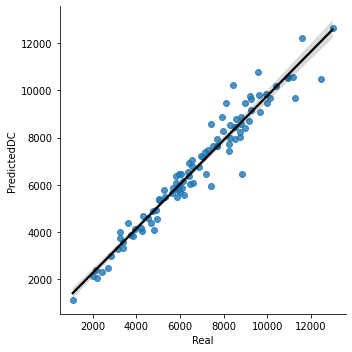

In [281]:
#visualising our predictions through intermediate plot
sns.lmplot(x='Real', y='PredictedDC', data=dataset_dc, line_kws={'color': 'black'});

# **Conclusion**

Write the conclusion here.